In [139]:
import pandas as pd
data = pd.read_csv(r'final.csv')

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_15532\3307276319.py:2: DtypeWarning: Columns (62,65,68,71) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r'final.csv')


In [149]:
data.columns(like = 'ingredient')

TypeError: 'Index' object is not callable

In [42]:
import recipe

data = recipe.load_recipe(15000)
print(data.shape)
data.columns

(15000, 14)


Index(['recipe_url', 'recipe_title', 'recipe_summary1', 'recipe_summary2',
       'recipe_summary3', 'recipe_ingredients', 'recipe_step', 'recipe_tag',
       'recipe_comment', 'recipe_view', 'recipe_category_type',
       'recipe_category_method', 'recipe_category_situation', 'row_cnt'],
      dtype='object')

In [75]:
# na값 제거
idx_notna= data['recipe_title'].notna() & data['recipe_ingredients'].notna() & data['recipe_step'].notna()
data_notna = data[idx_notna].copy()

#추석요리 #전김밥만들기 #추석남은음식활용요리 #추석전을 이용한 김밥만들기 #꼬지전과 녹두전이 들어간 전김밥!!
#레토르트요리 #장어덮밥만들기 #날치알과 성게알이들어간 장어덮밥 #레토르트이지만 훌륭하고 영양 만점의 한끼!!
#남은된장찌개활용요리 #된장순두부찌개를 이용한 된장죽만들기 #한그릇 #구수하고 부드럽고 속이 편안해지는 된장죽!!
초간단 와인 가리비 홍합찜, Steamd Mussels with Scallops, 와인 버터 홍합찜 만드는 법
Salted Butter ))) 집에서 과자 만들기 | 갈레트브루통 이 레시피로 만들어 보세요 : 구움과자 가염버터
#남은양념활용요리 #남은오삼불고기볶음밥만들기 #참치통조림과 김가루를 넣어서 만든 오삼불고기볶음밥!! 한끼해결이요!!
[깍두기치즈볶음밥, 집밥백선생 백종원 레시피] 깍두기 식감과 주욱 늘어나는 치즈의 고소함으로 맛이 두 배로 업글!
초간단 우삼겹 규동!!! 정말 간단하면서 맛있는 일본식 소고기 덮밥!!!오뚜기 메밀소바장국과 소고기다시다 규동소스
#깨소금 듬뿍 넣고 무쳐낸 고소한 냉이된장무침만들기 #통깨를 으깨어서 고소한 깨소금을 만들어서 냉이에 무쳐낸 냉이된
우엉조림, 가자미 구이, 얼갈이 나물, 들깨 미역국, 아이 반찬, 들깨 요리, 유아 반찬, 유아식 식단, 4살 식단
가리비 관자구이, 컬리플라워 퓨레, 비에르쥬 소스 - Scallop Steak, Cauliflower Puree,
#잔치국수국물활용 #남은잔치국수국물로 계란탕만들기 #남은 육수를 버리지 않고 계란 풀어서 계란탕으로 변신시키자!!
[아보카도로 만든 과카몰리 만드는 법] 새로운 맛의 과카몰리 소스, 나초나 바게트와 함께 먹으니 꽤 맛있어요.
#편스토랑 #이영자목살구이 #닭목살구이 만들기 #닭목살구이양념 #양꼬치양념을 넣으면 닭목살의 잡내 잡는데에는 끝!!
#맛있는녀석들의 꿀팁!!! 묵말랭이유부초밥 만들기 #묵말랭이 먹어는 보셨나요~~~ 끝내주게 쫀득한 요요녀석에 반해
소고기완자 [표고버섯과 두부 넣어 더 맛있는 영양 듬뿍 고단백 완자! 고소하

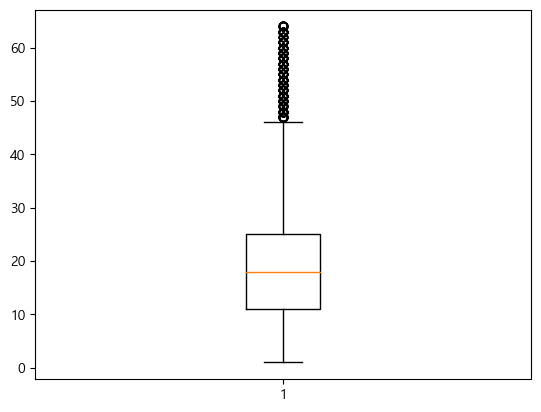

In [93]:
import matplotlib.pyplot as plt
title_len = data_notna['recipe_title'].apply(len)
plt.boxplot(title_len)
for i in list(title_len[title_len > 60].index):
    print(data_notna.recipe_title.loc[i])

['만두피1봉지(20개분량)', '쇠고기100g', '돼지고기100g', '양파1/3개', '숙주나물100g', '두부100g']
['쇠고기(양지머리)200g', '물2000cc', '대파1/2대', '통마늘3쪽', '다시마사방15cm1장', '통후추1작은술', '청주1큰술']
['소금1/2작은술', '잘게다진파2큰술', '다진마늘2작은술', '다진생강1/3작은술', '깨소금1작은술', '참기름2작은술']
['국간장1큰술', '소금약간', '후춧가루약간', '대파1/2대', '다진마늘1작은술', '달걀1개']
['밥1인분', '계란1개', '참기름약간', '고추장약간']
['콩나물2줌', '소금1/2스푼', '진간장2스푼', '고춧가루2스푼', '참기름1스푼']
['시금치2줌', '소금4꼬집', '참기름1스푼', '깨1/2스푼']
['맛타리버섯2줌', '소금4꼬집', '다진마늘1/2스푼']
['당근5cm', '소금2꼬집', '후추2꼬집']
['소고기불고기용1컵', '양파1/4개', '진간장2스푼', '맛술2스푼', '설탕1스푼', '참기름1스푼']
['무100g', '마늘1숟가락', '멸치액젓1숟가락', '참기름1숟가락', '고춧가루1숟가락', '식초1숟가락', '깨소금약간']
['시금치150g', '마늘1숟가락', '멸치액젓2숟가락', '참기름2숟가락', '깨소금약간']
['숙주100g', '크래미3개', '마늘1숟가락', '멸치액젓1숟가락', '참기름1숟가락', '깨소금약간']
['닭봉200g', '미니파프리카2개', '간장2숟가락', '쌀조청2숟가락', '맛술2숟가락', '참기름약간', '후추약간', '마늘약간']
['양배추5장', '당근1/3개', 'HACCP옥수수통조림2큰술', '건포도1큰술', 'HACCP마요네즈3큰술', '식초1큰술', '레몬즙1작은술', 'HACCP소금1작은술', 'HACCP설탕1/4작은술', '바질가루약간', '후추약간', 'HACCP삶은계란1개']
['마요네즈3큰술', '홀그레인머스타드소스1큰술', 'HACCP올리고당1작은술'

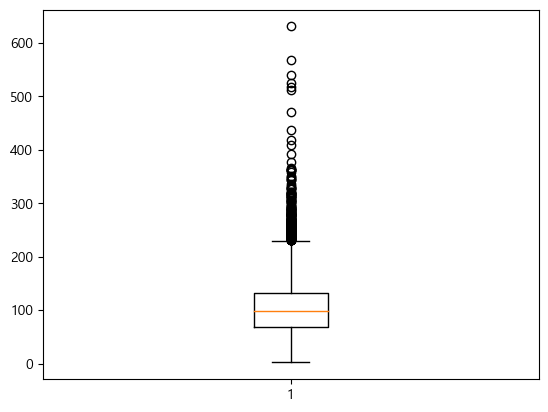

In [119]:
ingre_len = data_notna['recipe_ingredients'].apply(len)
plt.boxplot(ingre_len)
for i in list(ingre_len[ingre_len > 300].index):
    row = data_notna.recipe_ingredients.loc[i]
    for value in ast.literal_eval(row).values():
        print(value)

In [112]:
import ast
ast.literal_eval(data_notna['recipe_ingredients'][66]).keys()

dict_keys(['재료', '양념'])

In [105]:
import json
json.loads(data_notna['recipe_ingredients'][1])


JSONDecodeError: Expecting property name enclosed in double quotes: line 1 column 2 (char 1)

#추석요리 #전김밥만들기 #추석남은음식활용요리 #추석전을 이용한 김밥만들기 #꼬지전과 녹두전이 들어간 전김밥!!
#레토르트요리 #장어덮밥만들기 #날치알과 성게알이들어간 장어덮밥 #레토르트이지만 훌륭하고 영양 만점의 한끼!!
#남은된장찌개활용요리 #된장순두부찌개를 이용한 된장죽만들기 #한그릇 #구수하고 부드럽고 속이 편안해지는 된장죽!!
초간단 와인 가리비 홍합찜, Steamd Mussels with Scallops, 와인 버터 홍합찜 만드는 법
Salted Butter ))) 집에서 과자 만들기 | 갈레트브루통 이 레시피로 만들어 보세요 : 구움과자 가염버터
#남은양념활용요리 #남은오삼불고기볶음밥만들기 #참치통조림과 김가루를 넣어서 만든 오삼불고기볶음밥!! 한끼해결이요!!
[깍두기치즈볶음밥, 집밥백선생 백종원 레시피] 깍두기 식감과 주욱 늘어나는 치즈의 고소함으로 맛이 두 배로 업글!
초간단 우삼겹 규동!!! 정말 간단하면서 맛있는 일본식 소고기 덮밥!!!오뚜기 메밀소바장국과 소고기다시다 규동소스
#깨소금 듬뿍 넣고 무쳐낸 고소한 냉이된장무침만들기 #통깨를 으깨어서 고소한 깨소금을 만들어서 냉이에 무쳐낸 냉이된
우엉조림, 가자미 구이, 얼갈이 나물, 들깨 미역국, 아이 반찬, 들깨 요리, 유아 반찬, 유아식 식단, 4살 식단
가리비 관자구이, 컬리플라워 퓨레, 비에르쥬 소스 - Scallop Steak, Cauliflower Puree,
#잔치국수국물활용 #남은잔치국수국물로 계란탕만들기 #남은 육수를 버리지 않고 계란 풀어서 계란탕으로 변신시키자!!
[아보카도로 만든 과카몰리 만드는 법] 새로운 맛의 과카몰리 소스, 나초나 바게트와 함께 먹으니 꽤 맛있어요.
#편스토랑 #이영자목살구이 #닭목살구이 만들기 #닭목살구이양념 #양꼬치양념을 넣으면 닭목살의 잡내 잡는데에는 끝!!
#맛있는녀석들의 꿀팁!!! 묵말랭이유부초밥 만들기 #묵말랭이 먹어는 보셨나요~~~ 끝내주게 쫀득한 요요녀석에 반해
소고기완자 [표고버섯과 두부 넣어 더 맛있는 영양 듬뿍 고단백 완자! 고소하

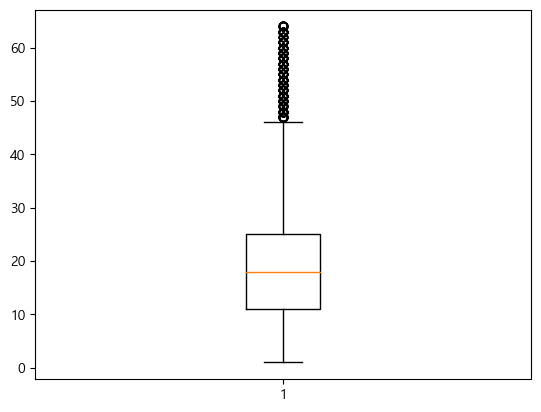

In [89]:
ingre_len = data_notna['recipe_ingredients'].apply(len)
plt.boxplot(ingre_len)
for i in list(title_len[title_len > 60].index):
    print(data_notna.recipe_title.loc[i])

In [73]:
title_len[title_len > 60]

KeyError: 'recipe_title'

In [60]:
row_not_na = data['recipe_title'].notna() & data['recipe_ingredients'].notna() & data['recipe_step'].notna()
data[['recipe_title']].apply(len, axis =1)

0        1
1        1
2        1
3        1
4        1
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Length: 15000, dtype: int64

In [34]:
data['recipe_title'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
14995    False
14996    False
14997    False
14998    False
14999    False
Name: recipe_title, Length: 15000, dtype: bool

In [1]:
import db
import oracle
import recipe
import svd

import pandas as pd


In [4]:
data = pd.read_csv(r'C:\Users\HwijunKwon\github\recipe\models\fin_recipe.csv')
final = pd.read_csv(r'C:\Users\HwijunKwon\github\recipe\models\final.csv')
data.shape, final.shape

C:\Users\HwijunKwon\AppData\Local\Temp\ipykernel_15532\4131670931.py:2: DtypeWarning: Columns (62,65,68,71) have mixed types. Specify dtype option on import or set low_memory=False.
  final = pd.read_csv(r'C:\Users\HwijunKwon\github\recipe\models\final.csv')


((71652, 76), (51493, 73))

In [27]:
final['unit1'][51488] 

nan

In [26]:
if final['unit1'][51488] : print("YES")
else : print("HI")

YES


In [5]:
matrix2 = recipe.recipe_food_matrix(final.loc[:2000])

  0%|          | 0/2001 [00:00<?, ?it/s]

 55%|█████▍    | 1095/2001 [00:04<00:03, 251.62it/s]


TypeError: argument of type 'float' is not iterable

In [3]:
matrix

,recipe_title,불닭소스,굴비,계란,열무김치,오이피클,전분,크래미,토마토케찹,삼겹살,...,계란노른자,냉동딸기,청고추,육수,갈비,두부,비트,강력분,다진홍고추,조선간장
0,호박 새우젓찌개 만드는 방법~★,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,깊은맛 나는 미역국 끓이는 방법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,순두부찌개....오도독 씹히는 미더덕이 들어간 순두부찌개!!,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,잡채 쉽게 만드는 방법,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,동래파전,0.0,0.0,200.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996,청경채무침,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,향긋한 미나리 무침,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1998,간단하게 먹는 부추 겉절이,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,찜닭 이렇게하면 실패없는 요리 !,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
